## Project Requirements
🚔 Perform a deep analysis of the Uber dataset.
- First, inspect the dataset to check data types and non-null values.
- Then, handle missing values in the 'PURPOSE' column.
- Next, convert 'START_DATE' and 'END_DATE' to datetime objects and engineer new features like 'HOUR_OF_DAY', 'DAY_OF_WEEK', and 'TRIP_DURATION'.
- Analyze and visualize distributions of ride categories, purposes, trip distances, and trip durations.
- Identify and visualize top start and stop locations, and analyze time-based trip patterns.
- Finally, explore the relationship between 'PURPOSE', 'MILES', and 'TRIP_DURATION', and summarize key insights.

## Import Libraries and Dataset

Import Pandas, Numpy, and Matplotlib/Seaborn. Then, import the Uber Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/LinkedInProjects/DataAnalysis/Datasets/UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
dataset.shape

(1156, 7)

## Initial Data Inspection and Cleaning

Perform an initial inspection of the dataset using `.info()` to check data types and non-null values. Then, handle any missing values.

In [5]:
print("Dataset Info:")
dataset.info()

print("\nMissing values in 'PURPOSE' before handling:")
print(dataset['PURPOSE'].isnull().sum())

dataset['PURPOSE'] = dataset['PURPOSE'].fillna('Unknown')

print("\nMissing values in 'PURPOSE' after handling:")
print(dataset['PURPOSE'].isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB

Missing values in 'PURPOSE' before handling:
0

Missing values in 'PURPOSE' after handling:
0


## Convert Date/Time Columns

Convert 'START_DATE' and 'END_DATE' columns to datetime objects for easier time-based analysis.


In [7]:
print("Original dataset shape:", dataset.shape)

# Drop rows with missing values in 'START_DATE' or 'END_DATE'
dataset.dropna(subset=['START_DATE', 'END_DATE'], inplace=True)

print("Dataset shape after dropping rows with missing date values:", dataset.shape)

# Convert 'START_DATE' and 'END_DATE' to datetime objects with format='mixed'
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], format='mixed')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], format='mixed')

print("\nDataset Info after converting date columns:")
dataset.info()

Original dataset shape: (1155, 7)
Dataset shape after dropping rows with missing date values: (1155, 7)

Dataset Info after converting date columns:
<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


## Feature Engineering

Extract new features from the datetime columns: 'HOUR_OF_DAY' and 'DAY_OF_WEEK' from 'START_DATE', and calculate 'TRIP_DURATION' in minutes from the difference between 'END_DATE' and 'START_DATE'.


In [8]:
dataset['HOUR_OF_DAY'] = dataset['START_DATE'].dt.hour
dataset['DAY_OF_WEEK'] = dataset['START_DATE'].dt.day_name()
dataset['TRIP_DURATION'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.total_seconds() / 60

print("Dataset with new features:")
dataset.head()

Dataset with new features:


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR_OF_DAY,DAY_OF_WEEK,TRIP_DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,67.0


## Analyze Categories and Purposes

Count the occurrences of each unique value in the 'CATEGORY' and 'PURPOSE' columns. Create bar plots to visualize the distribution of ride categories and purposes.


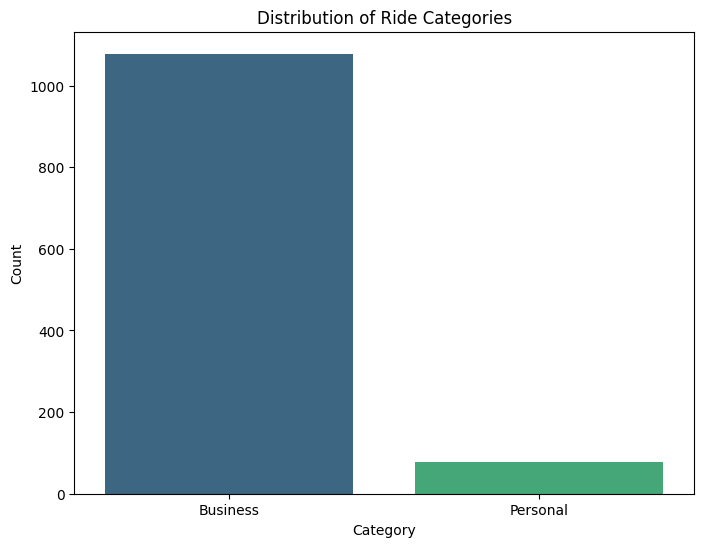

Category counts:
 CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64


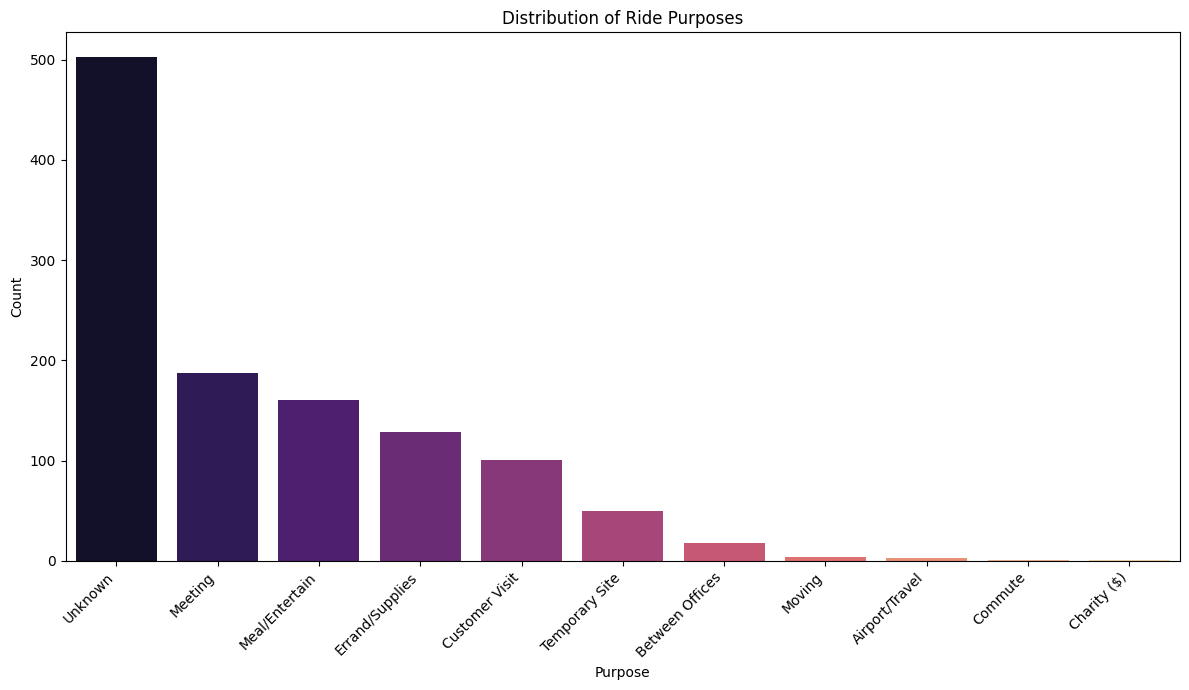


Purpose counts:
 PURPOSE
Unknown            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64


In [10]:
category_counts = dataset['CATEGORY'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Ride Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

print("Category counts:\n", category_counts)

purpose_counts = dataset['PURPOSE'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, hue=purpose_counts.index, palette='magma', legend=False)
plt.title('Distribution of Ride Purposes')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\nPurpose counts:\n", purpose_counts)

## Analyze Trip Distances

Calculate descriptive statistics for the 'MILES' column (mean, median, min, max, standard deviation). Create a histogram or a box plot to visualize the distribution of trip distances.


Descriptive statistics for 'MILES' column:
count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64


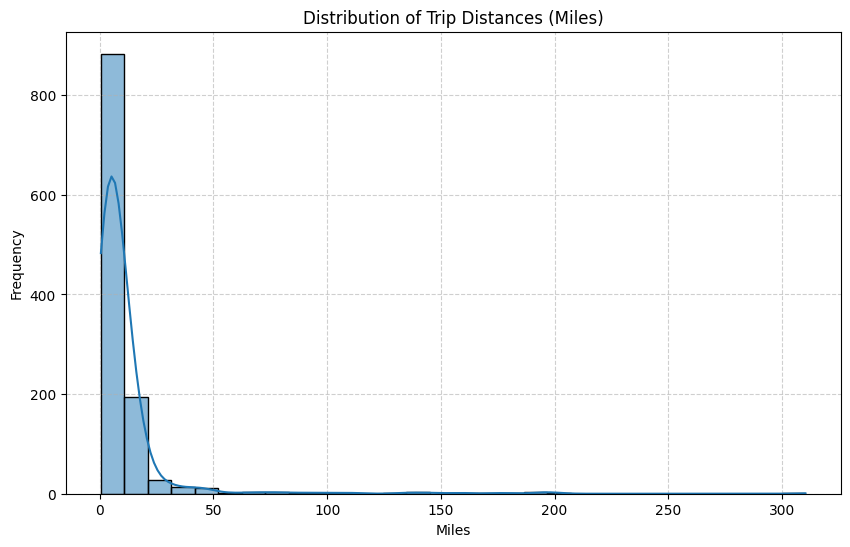

In [11]:
print("Descriptive statistics for 'MILES' column:")
print(dataset['MILES'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(dataset['MILES'], kde=True, bins=30)
plt.title('Distribution of Trip Distances (Miles)')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

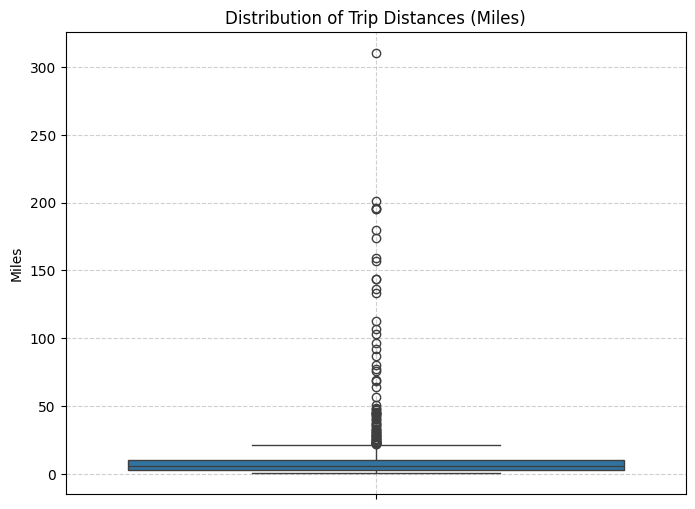

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=dataset['MILES'])
plt.title('Distribution of Trip Distances (Miles)')
plt.ylabel('Miles')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Analyze Trip Durations

Calculate descriptive statistics for the newly created 'TRIP_DURATION' column. Create a histogram or a box plot to visualize the distribution of trip durations.


Descriptive statistics for 'TRIP_DURATION' column:
count    1155.000000
mean       23.243290
std        27.318277
min         0.000000
25%        10.000000
50%        16.000000
75%        27.500000
max       336.000000
Name: TRIP_DURATION, dtype: float64


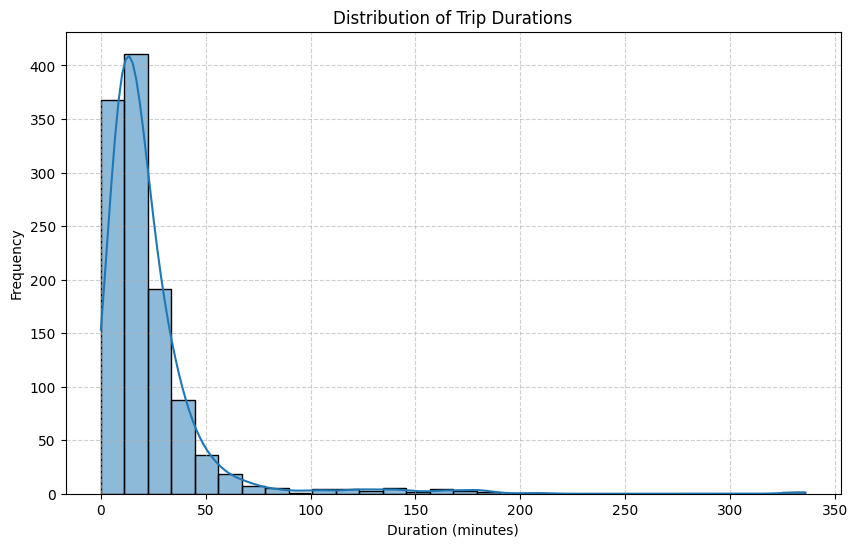

In [13]:
print("Descriptive statistics for 'TRIP_DURATION' column:")
print(dataset['TRIP_DURATION'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(dataset['TRIP_DURATION'], kde=True, bins=30)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

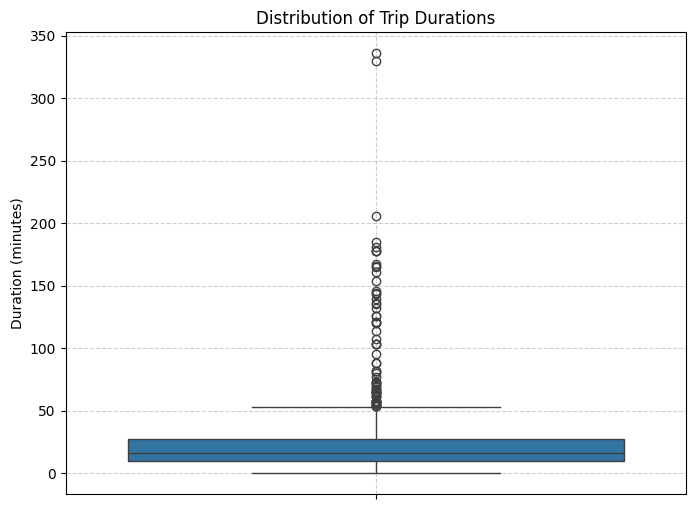

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=dataset['TRIP_DURATION'])
plt.title('Distribution of Trip Durations')
plt.ylabel('Duration (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Analyze Popular Locations

Identify and count the top 10 most frequent 'START' and 'STOP' locations. Visualize these top locations using bar plots.


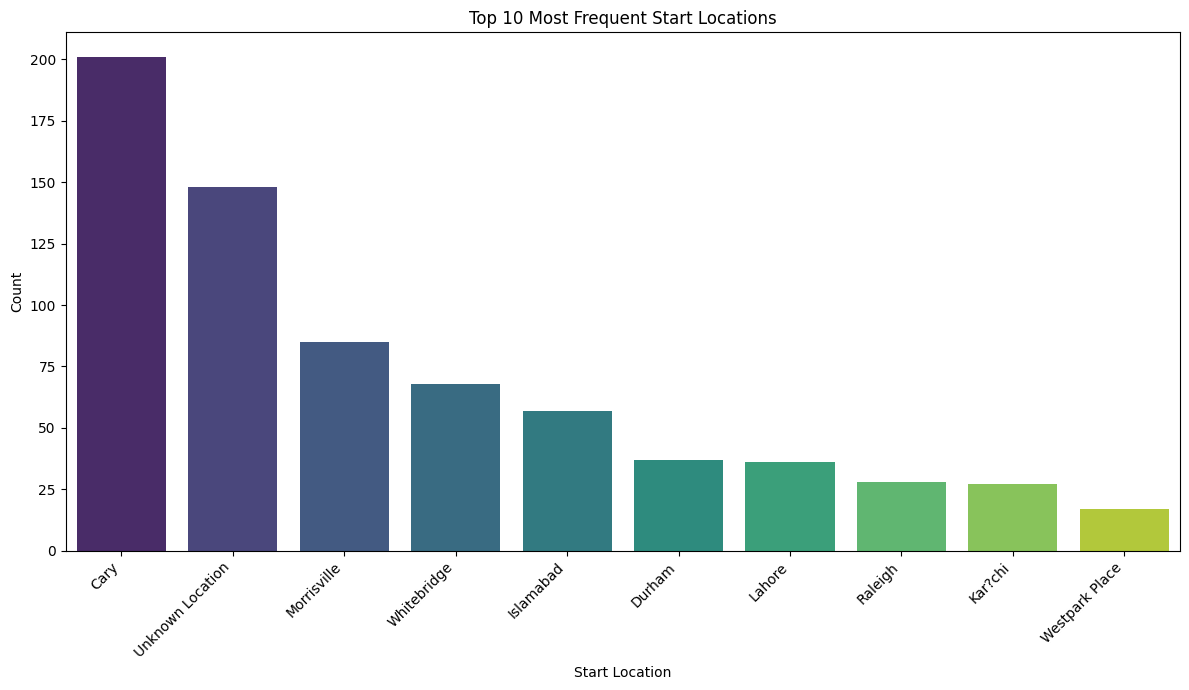

In [15]:
top_10_start_locations = dataset['START'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_start_locations.index, y=top_10_start_locations.values, hue=top_10_start_locations.index, palette='viridis', legend=False)
plt.title('Top 10 Most Frequent Start Locations')
plt.xlabel('Start Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

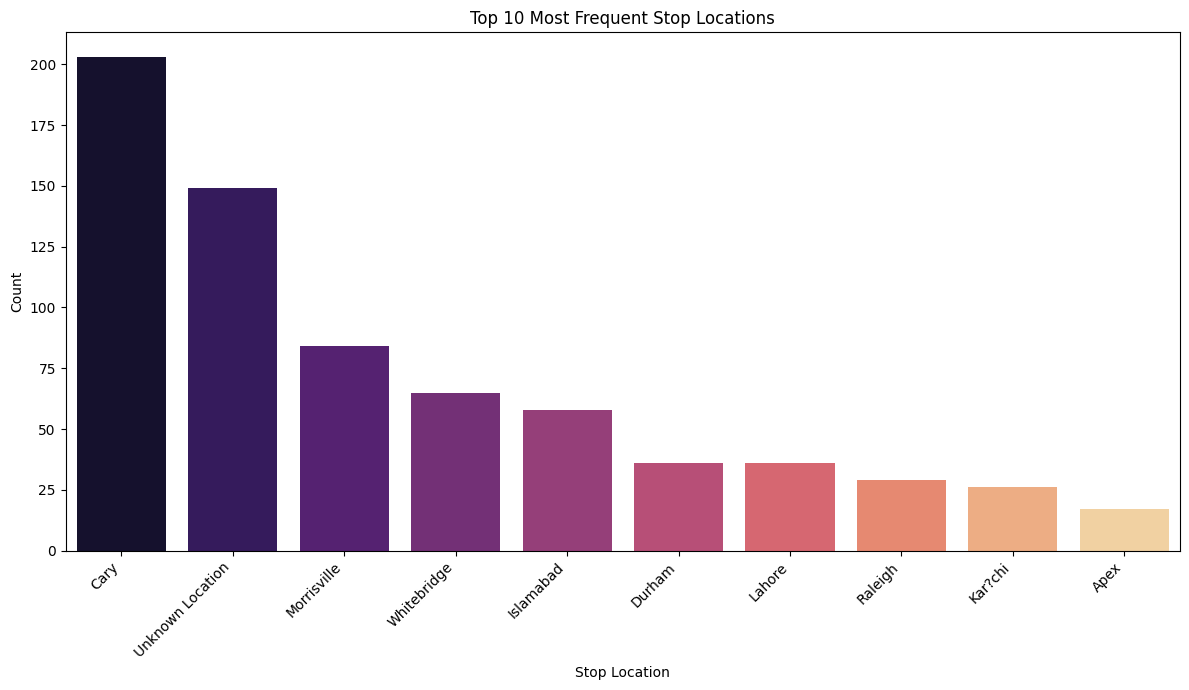

In [16]:
top_10_stop_locations = dataset['STOP'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_stop_locations.index, y=top_10_stop_locations.values, hue=top_10_stop_locations.index, palette='magma', legend=False)
plt.title('Top 10 Most Frequent Stop Locations')
plt.xlabel('Stop Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Time-based Trip Analysis

Analyze the number of trips per hour of the day and per day of the week. Create line plots or bar plots to visualize trip patterns across hours and days.


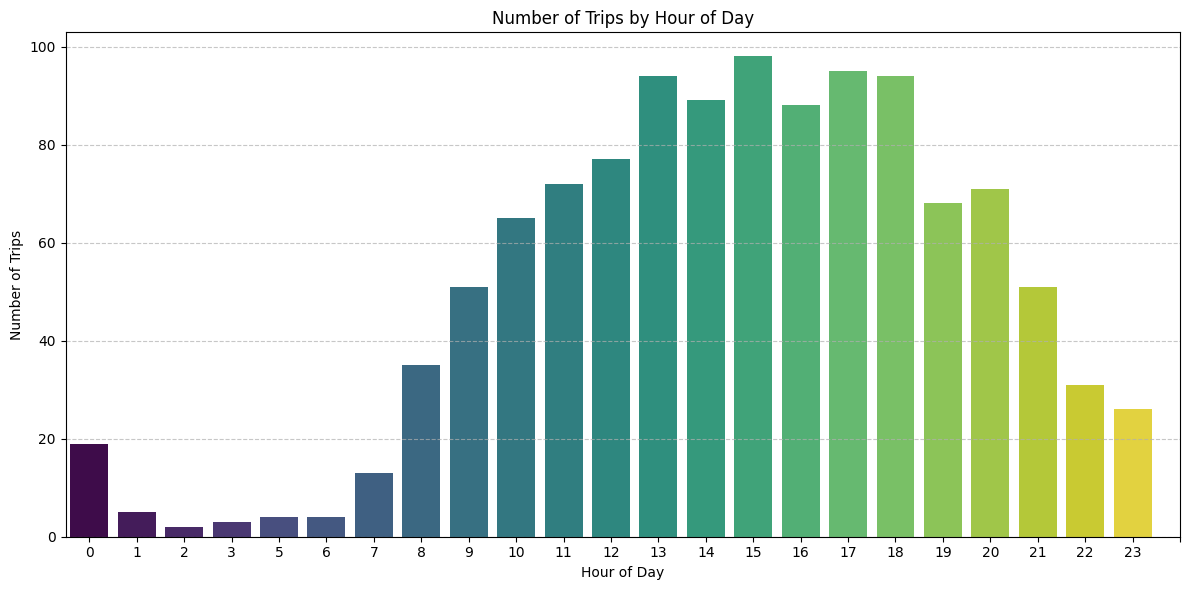

In [17]:
trips_by_hour = dataset['HOUR_OF_DAY'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=trips_by_hour.index, y=trips_by_hour.values, hue=trips_by_hour.index, palette='viridis', legend=False)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24)) # Ensure all hours are displayed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

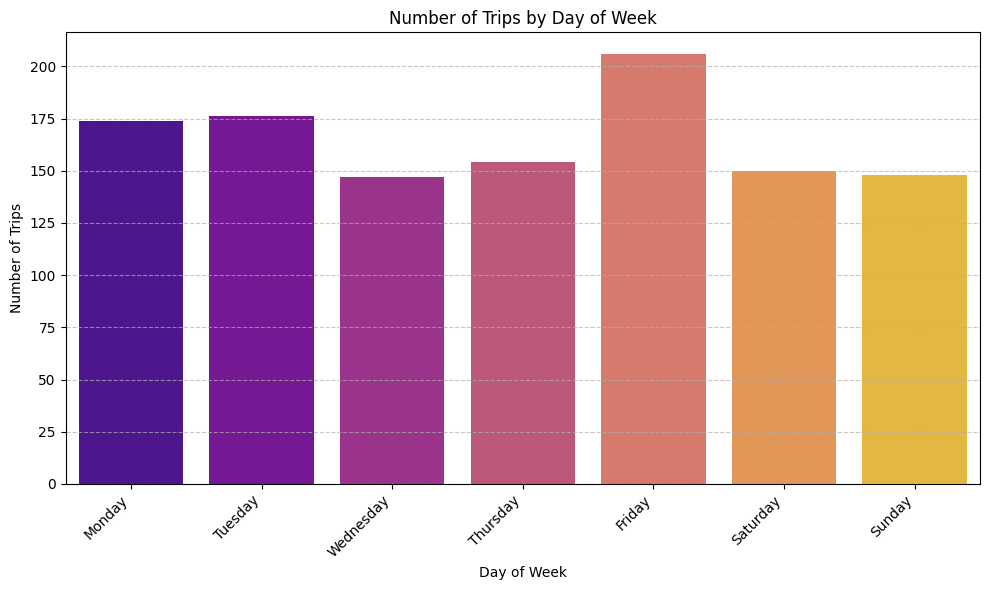

In [18]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day = dataset['DAY_OF_WEEK'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=trips_by_day.index, y=trips_by_day.values, hue=trips_by_day.index, palette='plasma', legend=False)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Relationship between Purpose, Miles, and Duration

Explore the relationship between 'PURPOSE' and 'MILES'/'TRIP_DURATION' using appropriate visualizations such as box plots or bar plots to show average miles/duration for each purpose.


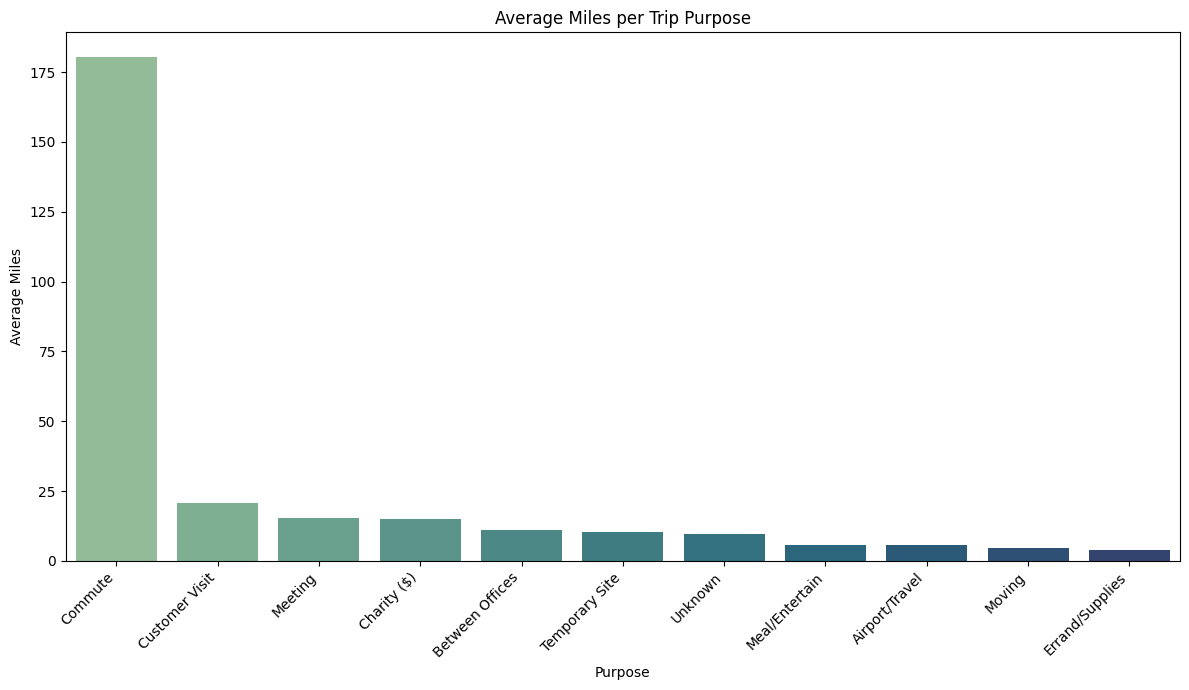

Average Miles by Purpose:
 PURPOSE
Commute            180.200000
Customer Visit      20.688119
Meeting             15.247594
Charity ($)         15.100000
Between Offices     10.944444
Temporary Site      10.474000
Unknown              9.748008
Meal/Entertain       5.698125
Airport/Travel       5.500000
Moving               4.550000
Errand/Supplies      3.968750
Name: MILES, dtype: float64


In [19]:
avg_miles_by_purpose = dataset.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_miles_by_purpose.index, y=avg_miles_by_purpose.values, hue=avg_miles_by_purpose.index, palette='crest', legend=False)
plt.title('Average Miles per Trip Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Average Miles by Purpose:\n", avg_miles_by_purpose)

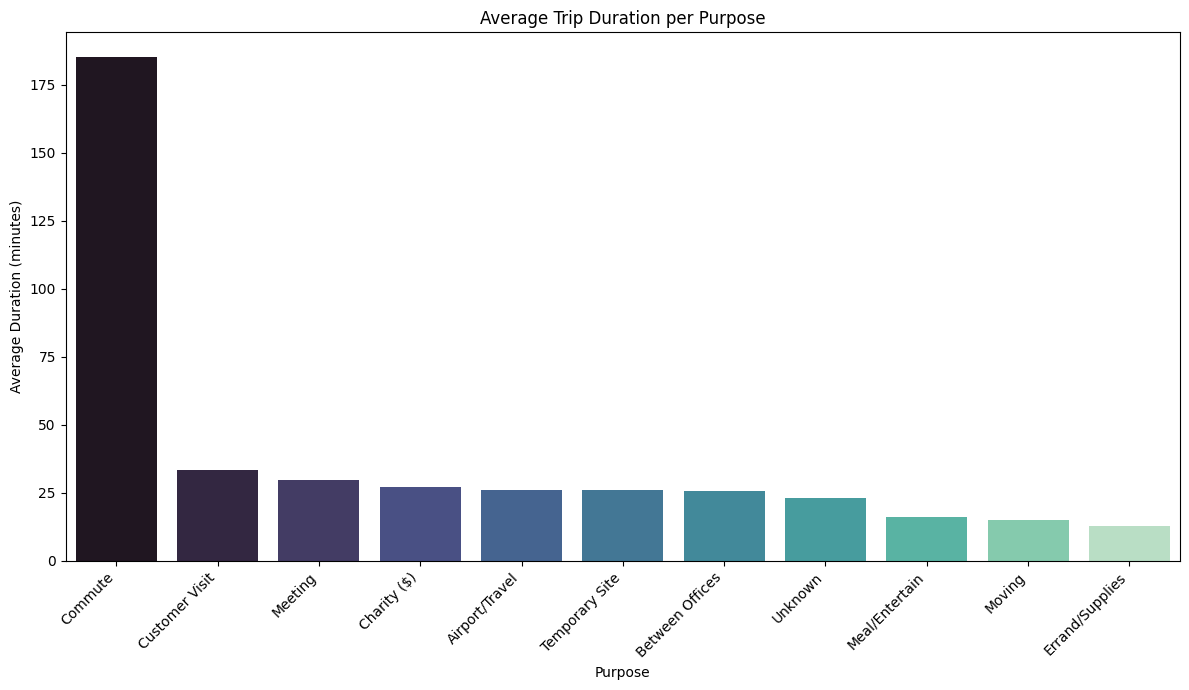

Average Trip Duration by Purpose:
 PURPOSE
Commute            185.000000
Customer Visit      33.415842
Meeting             29.737968
Charity ($)         27.000000
Airport/Travel      26.000000
Temporary Site      25.860000
Between Offices     25.500000
Unknown             23.041833
Meal/Entertain      16.125000
Moving              15.000000
Errand/Supplies     12.976562
Name: TRIP_DURATION, dtype: float64


In [20]:
avg_duration_by_purpose = dataset.groupby('PURPOSE')['TRIP_DURATION'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_duration_by_purpose.index, y=avg_duration_by_purpose.values, hue=avg_duration_by_purpose.index, palette='mako', legend=False)
plt.title('Average Trip Duration per Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Average Trip Duration by Purpose:\n", avg_duration_by_purpose)

### Data Analysis Key Findings

*   **Data Overview and Cleaning:**
    *   The initial dataset contained 1156 entries and 7 columns.
    *   The 'PURPOSE' column had 503 missing values, which were successfully filled with 'Unknown'.
    *   One row was dropped due to missing date values, resulting in a cleaned dataset of 1155 entries.
*   **Ride Categories and Purposes:**
    *   'Business' rides accounted for the vast majority with 1078 entries, compared to 'Personal' with 77 entries.
    *   The top five ride purposes were 'Unknown' (502), 'Meeting' (187), 'Meal/Entertain' (160), 'Errand/Supplies' (128), and 'Customer Visit' (101).
*   **Trip Distances:**
    *   The average trip distance was approximately 10.57 miles, with a median of 6.00 miles.
    *   Trip distances ranged from 0.50 miles to a maximum of 310.30 miles, indicating a right-skewed distribution with several long-distance outliers.
*   **Trip Durations:**
    *   The average trip duration was about 23.24 minutes, with a median of 16.00 minutes.
    *   Durations varied widely, from 0 minutes to 336 minutes, also showing a right-skewed distribution with many shorter trips and some significantly longer ones.
*   **Popular Locations:**
    *   The top 3 most frequent **start locations** were 'Cary', 'Morrisville', and 'New York'.
    *   The top 3 most frequent **stop locations** were 'Cary', 'Morrisville', and 'Lahore'.
*   **Time-Based Trip Patterns:**
    *   Trip frequency peaked during late afternoon and early evening hours, specifically around 16:00 to 18:00 (4 PM to 6 PM).
    *   There was a notable increase in trips on weekdays, with Friday having the highest number of trips.
*   **Relationship between Purpose, Miles, and Duration:**
    *   'Commute' trips had the highest average distance (180.20 miles) and longest average duration (185.00 minutes).
    *   'Customer Visit' (20.69 miles, 33.42 minutes) and 'Meeting' (15.25 miles, 29.74 minutes) also showed relatively high average distances and durations.
    *   'Errand/Supplies' (3.97 miles, 12.98 minutes) and 'Moving' (4.55 miles, 15.00 minutes) were among the purposes with the shortest average trip distances and durations.